# <center> ЛАБОРАТОРНАЯ РАБОТА 1 <center>

# <center> Крылова Мария <center>
# <center> Соловьев Илья <center>
# <center> Кленков Андрей <center>





## Часть 0. Импорты <a id="part0"></a>

In [ ]:
!pip install graphviz
!pip install pydotplus

In [ ]:
from IPython.display import Image
from sklearn import metrics
from sklearn import preprocessing
from sklearn import svm
from sklearn.externals.six import StringIO
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from xgboost import plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
import xgboost

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


## Часть 1. Первичный анализ данных <a id="part1"></a>

In [ ]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_colwidth', None)

В датасете содержатся описание 8124 экземпляров по 23 признакам. 

In [ ]:
df = pd.read_csv("mushrooms.csv")
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Рассмотрим наш датасет и подробное его описание.

In [ ]:
df.shape

(8124, 23)

**Attribute Information:**


*   **classes:** 
1.   edible=e
2.   poisonous=p

*   **cap-shape:**
1.   bell=b
2.   conical=c
3.   convex=x
4.   flat=f
5.   knobbed=k
6.   sunken=s

*   **cap-color:**
1.   brown=n
2.   buff=b
3.   cinnamon=c
4.   gray=g
5.   green=r
6.   pink=p
7.   purple=u
8.   red=e
9.   white=w
10.   yellow=y

*   **bruises:**
1.   bruises=t
2.   no=f

*   **odor:**

1.   almond=a
2.   anise=l
3.   creosote=c
4.   fishy=y
5.   foul=f
6.   musty=m
7.   none=n
8.   pungent=p
9.   spicy=s

*   **gill-attachment:**
1.   attached=a
2.   descending=d
3.   free=f
4.   notched=n

*   **gill-spacing:**
1.   close=c
2.   crowded=w
3.   distant=d

*   **gill-size:**
1.   broad=b
2.   narrow=n 

*   **gill-color:**
1.   black=k
2.   brown=n
3.   buff=b
4.   chocolate=h
5.   gray=g
6.   green=r
7.   orange=o
8.   pink=p
9.   purple=u
10.   red=e
11.   white=w
12.   yellow=y

*   **stalk-shape:**
1.   enlarging=e
2.   tapering=t

*   **stalk-root:**
1.   bulbous=b
2.   club=c
3.   cup=u
4.   equal=e
5.   rhizomorphs=z
6.   rooted=r
7.   missing=?

*   **stalk-surface-above-ring:**
1.   fibrous=f
2.   scaly=y
3.   silky=k
4.   smooth=s
 
*   **stalk-surface-below-ring:**
1.   fibrous=f
2.   scaly=y
3.   silky=k
4.   smooth=s

*   **stalk-color-above-ring:**
1.   brown=n
2.   buff=b
3.   cinnamon=c
4.   gray=g
5.   orange=o
6.   pink=p
7.   red=e
8.   white=w
9.   yellow=y

*   **stalk-color-below-ring:**
1.   brown=n
2.   buff=b
3.   cinnamon=c
4.   gray=g
5.   orange=o
6.   pink=p
7.   red=e
8.   white=w
9.   yellow=y

*   **veil-type:**
1.   partial=p
2.   universal=u

*   **veil-color:**
1.   brown=n
2.   orange=o
3.   white=w
4.   yellow=y

*   **ring-number:**
1.   none=n
2.   one=o
3.   two=t

*   **ring-type:**
1.   cobwebby=c
2.   evanescent=e
3.   flaring=f
4.   large=l
5.   none=n
6.   pendant=p
7.   sheathing=s
8.   zone=z

*   **spore-print-color:**
1.   black=k
2.   brown=n
3.   buff=b
4.   chocolate=h
5.   green=r
6.   orange=o
7.   purple=u
8.   white=w
9.   yellow=y

*   **population:**
1.   abundant=a
2.   clustered=c
3.   numerous=n
4.   scattered=s
5.   several=v
6.   solitary=y

*   **habitat:**
1.   grasses=g
2.   leaves=l
3.   meadows=m
4.   paths=p
5.   urban=u
6.   waste=w
7.   woods=d

Все признаки данного датасета являются категориальными и содержат 2 и более типов каждого из значения аттрибутов. Далее рассмотрим, есть ли нулевые значения, если да, то исключим их.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Среди представленных данных нулевых значений нет. Найдем, какие уникальные значения каждого из признаков присутсвуют в датасете, заодно проверим наличие опечаток

In [ ]:
for column in df.columns:
    print(column,":",df[column].unique())

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


Опечаток в данных нет. Но при этом в признаках gill-spacing, gill-attachment, stalk-root, veil-type и ring-type представлены не все возможные признаки. При этом в признаке veil-type все данные имеют значение - p(partial), а значит его можно исключить. Признаки же class, bruises, gill-attachement, gill-spacing, gill-size, stalk-shape являются бинарными.

In [ ]:
df = df.drop(columns=['veil-type'])

In [ ]:
mis_val_table = pd.concat([df.isna().sum()], axis = 1)
mis_val_table = mis_val_table.rename(columns = { 0: "Missing values count"})
mis_val_table

,Missing values count
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


Среди оставшихся признаков пропущенных значений нет

Рассмотрим, как распределяются значения признаков в процентном соотношении

In [ ]:
for col in df.columns:
   print(df.groupby(col).size() / len(df) * 100)
   print()

class
e    51.797144
p    48.202856
dtype: float64

cap-shape
b     5.563762
c     0.049237
f    38.798621
k    10.192024
s     0.393895
x    45.002462
dtype: float64

cap-surface
f    28.557361
g     0.049237
s    31.462334
y    39.931068
dtype: float64

cap-color
b     2.067947
c     0.541605
e    18.463811
g    22.648941
n    28.114229
p     1.772526
r     0.196947
u     0.196947
w    12.801576
y    13.195470
dtype: float64

bruises
f    58.444116
t    41.555884
dtype: float64

odor
a     4.923683
c     2.363368
f    26.587888
l     4.923683
m     0.443131
n    43.426883
p     3.151157
s     7.090103
y     7.090103
dtype: float64

gill-attachment
a     2.584934
f    97.415066
dtype: float64

gill-spacing
c    83.85032
w    16.14968
dtype: float64

gill-size
b    69.079271
n    30.920729
dtype: float64

gill-color
b    21.270310
e     1.181684
g     9.256524
h     9.010340
k     5.022157
n    12.900049
o     0.787789
p    18.365337
r     0.295421
u     6.056130
w    14.795667
y     1

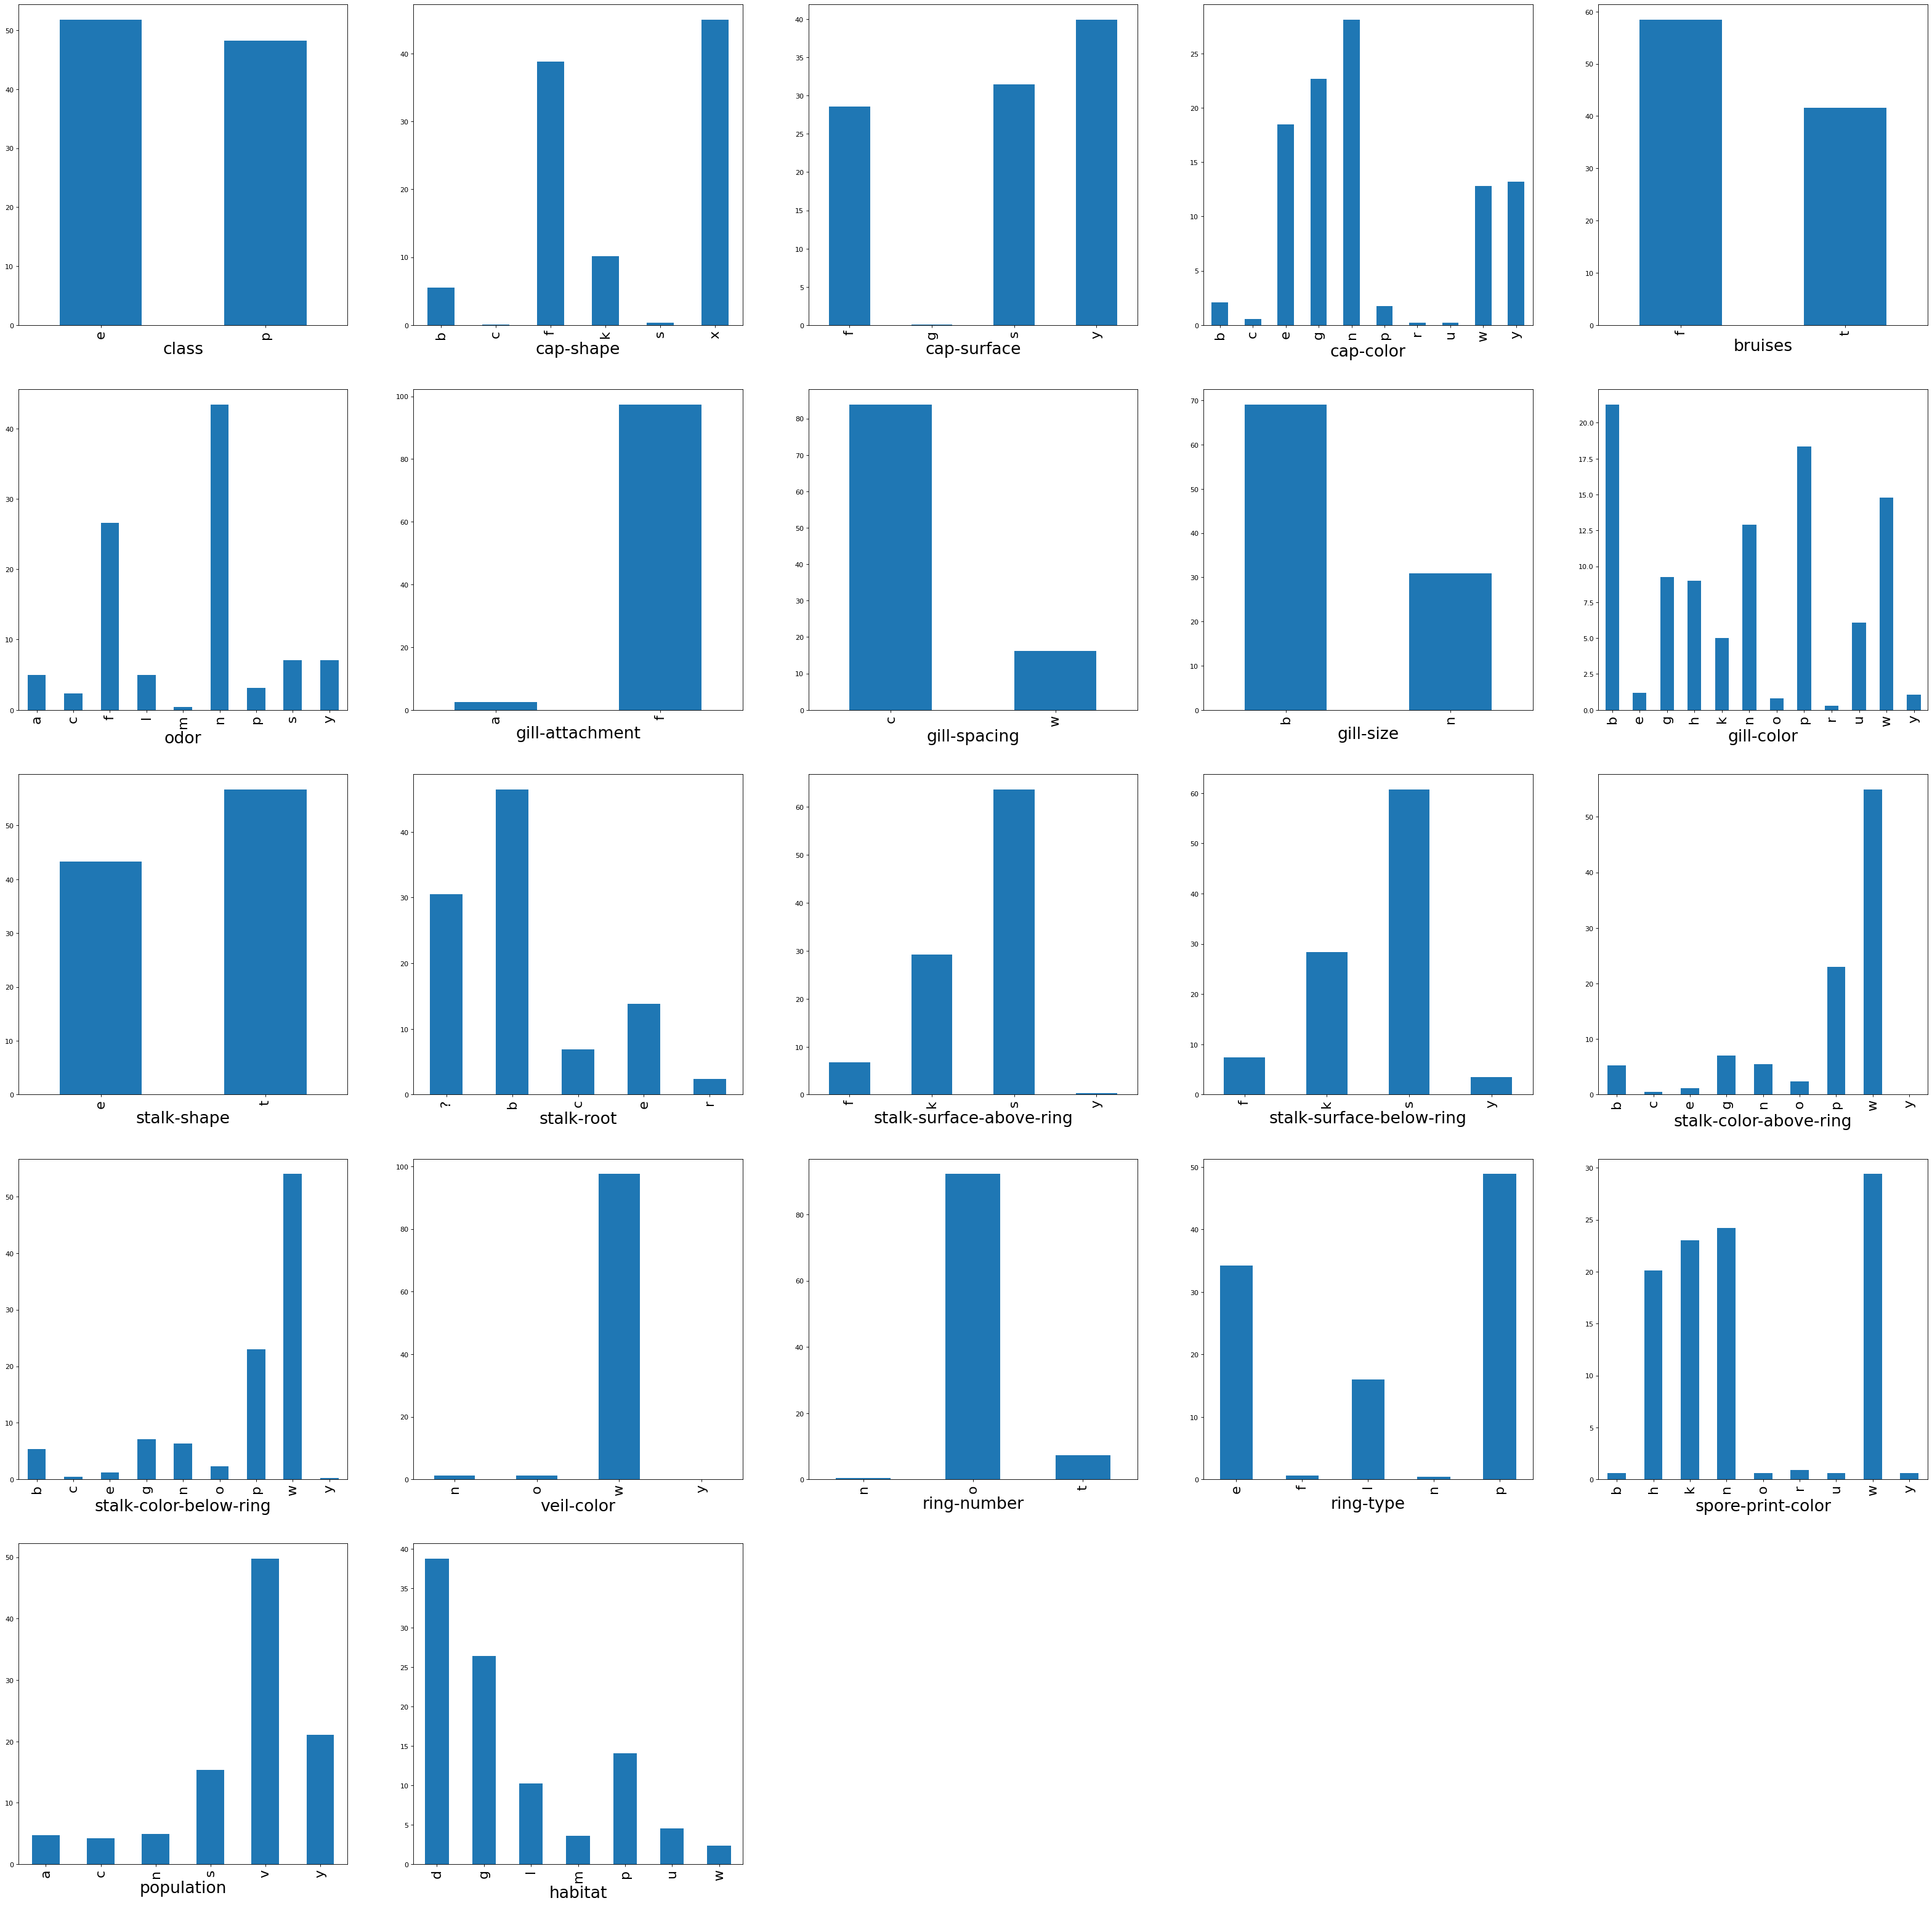

In [ ]:
plt.figure(num = None, figsize = (50, 50), dpi = 80)
i = 0
for col in df.columns:
  plt.subplot(5, 5, i + 1)
  plt.xlabel(col, fontsize=24)
  plt.xticks(fontsize=20, rotation=90)
  i += 1
  (df.groupby(col).size() / len(df) * 100).plot.bar()

Распределение целевой переменной является очень гармоничным. А вот признак veil-color бесполезен, так как меньше 2.5% приходится на не w(white) цвет. Удалим его

In [ ]:
df = df.drop(columns=['veil-color'])

Переведём бинарные категориальные признаки в числовые.

In [ ]:
df['is_poisonous'] = (df['class'] == 'p').astype('int')
df['is_bruised'] = (df['bruises'] == 't').astype('int')
df['is_gill_attached'] = (df['gill-attachment'] == 'a').astype('int')
df['is_gill_closed'] = (df['gill-spacing'] == 'c').astype('int')
df['is_gill_broad'] = (df['gill-size'] == 'b').astype('int')
df['is_stalk_enlarged'] = (df['stalk-shape'] == 'e').astype('int')

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,...,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat,is_poisonous,is_bruised,is_gill_attached,is_gill_closed,is_gill_broad,is_stalk_enlarged
0,p,x,s,n,t,p,f,c,n,k,e,e,...,w,o,p,k,s,u,1,1,0,1,0,1
1,e,x,s,y,t,a,f,c,b,k,e,c,...,w,o,p,n,n,g,0,1,0,1,1,1
2,e,b,s,w,t,l,f,c,b,n,e,c,...,w,o,p,n,n,m,0,1,0,1,1,1
3,p,x,y,w,t,p,f,c,n,n,e,e,...,w,o,p,k,s,u,1,1,0,1,0,1
4,e,x,s,g,f,n,f,w,b,k,t,e,...,w,o,e,n,a,g,0,0,0,0,1,0


In [ ]:
df = df.drop(columns=['class', 'bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape'])

In [ ]:
df.head()

,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat,is_poisonous,is_bruised,is_gill_attached,is_gill_closed,is_gill_broad,is_stalk_enlarged
0,x,s,n,p,k,e,s,s,w,w,o,p,k,s,u,1,1,0,1,0,1
1,x,s,y,a,k,c,s,s,w,w,o,p,n,n,g,0,1,0,1,1,1
2,b,s,w,l,n,c,s,s,w,w,o,p,n,n,m,0,1,0,1,1,1
3,x,y,w,p,n,e,s,s,w,w,o,p,k,s,u,1,1,0,1,0,1
4,x,s,g,n,k,e,s,s,w,w,o,e,n,a,g,0,0,0,0,1,0


В признаках `ring-number` и `population` можно определить порядок сравнения в типах(`two` > `one`, `abundant` > `solitary`), поэтому эти признаки можно представить в виде порядковых (числовых).

In [ ]:
cleanup_nums = {"ring-number": {"n": 0, "o": 1, "t": 2},
                "population":  {"y": 0, "v": 1, "s": 2, "n": 3, "c": 4, "a":5}}

In [ ]:
df = df.replace(cleanup_nums)
df.head()

,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat,is_poisonous,is_bruised,is_gill_attached,is_gill_closed,is_gill_broad,is_stalk_enlarged
0,x,s,n,p,k,e,s,s,w,w,1,p,k,2,u,1,1,0,1,0,1
1,x,s,y,a,k,c,s,s,w,w,1,p,n,3,g,0,1,0,1,1,1
2,b,s,w,l,n,c,s,s,w,w,1,p,n,3,m,0,1,0,1,1,1
3,x,y,w,p,n,e,s,s,w,w,1,p,k,2,u,1,1,0,1,0,1
4,x,s,g,n,k,e,s,s,w,w,1,e,n,5,g,0,0,0,0,1,0


Остальные признаки являются непорядковыми категориальными признаками, поэтому преобразуем их с помощью OneHotEncoder

In [ ]:
cols = ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring',
        'stalk-surface-below-ring', 'stalk-color-above-ring',	'stalk-color-below-ring', 'ring-type', 'spore-print-color', 'habitat']
prefixes = ['cap_shape', 'cap_surf', 'cap_col', 'odor', 'gill_col', 'stalk_root', 'stalk_surf_above',
            'stalk_sufr_below', 'stalk_col_above', 'stalk_col_below', 'ring', 'spore_col', 'habitat']
df_enc = pd.get_dummies(df, columns=cols, prefix=prefixes)

In [ ]:
df_enc.head()

,ring-number,population,is_poisonous,is_bruised,is_gill_attached,is_gill_closed,is_gill_broad,is_stalk_enlarged,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,...,spore_col_o,spore_col_r,spore_col_u,spore_col_w,spore_col_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,2,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0
1,1,3,0,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0
2,1,3,0,1,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0
3,1,2,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0
4,1,5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0


Проверим все ли данные переведены в числовой вид

In [ ]:
df_enc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 101 columns):
 #   Column              Dtype
---  ------              -----
 0   ring-number         int64
 1   population          int64
 2   is_poisonous        int64
 3   is_bruised          int64
 4   is_gill_attached    int64
 5   is_gill_closed      int64
 6   is_gill_broad       int64
 7   is_stalk_enlarged   int64
 8   cap_shape_b         uint8
 9   cap_shape_c         uint8
 10  cap_shape_f         uint8
 11  cap_shape_k         uint8
 12  cap_shape_s         uint8
 13  cap_shape_x         uint8
 14  cap_surf_f          uint8
 15  cap_surf_g          uint8
 16  cap_surf_s          uint8
 17  cap_surf_y          uint8
 18  cap_col_b           uint8
 19  cap_col_c           uint8
 20  cap_col_e           uint8
 21  cap_col_g           uint8
 22  cap_col_n           uint8
 23  cap_col_p           uint8
 24  cap_col_r           uint8
 25  cap_col_u           uint8
 26  cap_col_w          

Всё верно, все признаки переведены в числовые. Можно переходить к классификации

## Часть 2. Создание моделей классификации <a id="part2"></a>

Выделим для удобства целевую переменную в отдельную переменную

In [ ]:
X = df_enc.drop(columns=['is_poisonous'])
y =  df_enc[['is_poisonous']]

## Дерево решений

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


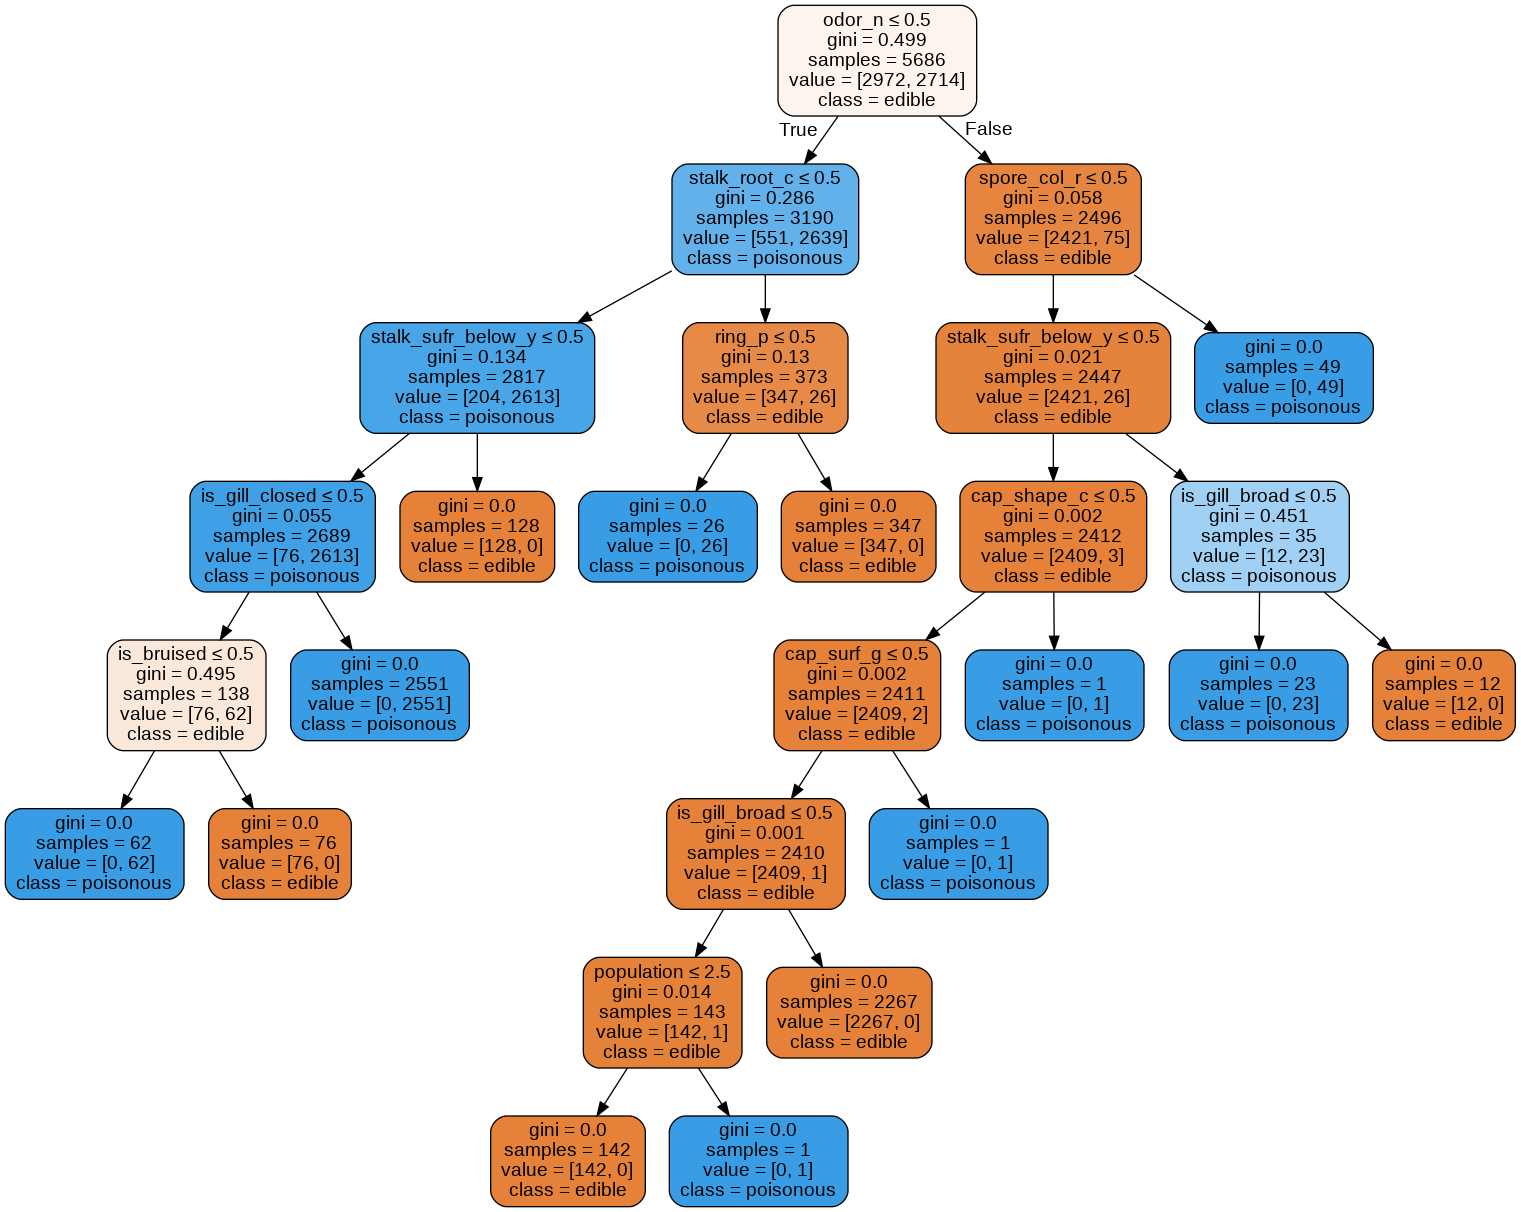

In [ ]:
feature_cols = X.columns
class_cols = ['edible','poisonous']
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names = class_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('desicion_tree.png')
Image(graph.create_png())

Полное дерево решений. В целом оно оказалось не такое и большое. Но всё же, зачем полное, если можно оптимизировать и добиться практически такой же точности?

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9618539786710418


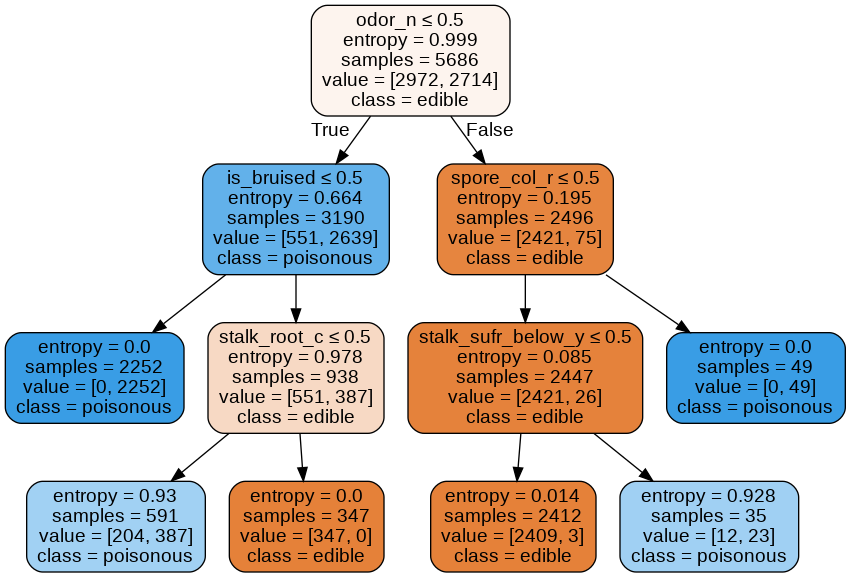

In [ ]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names = feature_cols,
                class_names = class_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree_optimised.png')
Image(graph.create_png())

Ограничив глубину дерева 3 слоями, добились точности в 96. Оптимальный показатель

##SVM - метод опорных векторов


Чтобы понять как рабоатет алгоритм классификации, провизуализировать его, классифицируем данные основываясь на двух признаках

In [ ]:
X_svm = df[['gill-color','spore-print-color']]
le = preprocessing.LabelEncoder()
X_svm['gill-color'] = le.fit_transform(X_svm['gill-color'])
X_svm['spore-print-color'] = le.fit_transform(X_svm['spore-print-color'])
y_svm =  df_enc['is_poisonous']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
X_svm

,gill-color,spore-print-color
0,4,2
1,4,3
2,5,3
3,5,2
4,4,3
...,...,...
8119,11,0
8120,11,0
8121,5,0
8122,0,7


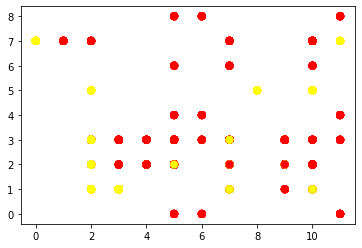

In [ ]:
plt.scatter(X_svm.iloc[:, 0], X_svm.iloc[:, 1], c=y_svm, s=50, cmap='autumn')

Были выбраны именно эти два признака, потому что у них много разных попарных значений. При попытке выбрать два другие, например в каждом из которых по два значения, всего было 4 точки на плоскости. Не так интересно и не так понятно.

In [ ]:
model = svm.SVC(kernel='linear', C=1)
model.fit(X_svm, y_svm)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

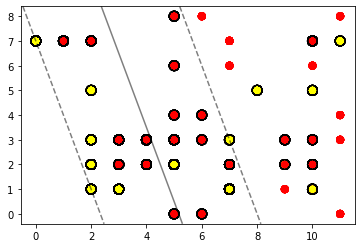

In [ ]:
ax = plt.gca()
plt.scatter(X_svm.iloc[:, 0], X_svm.iloc[:, 1], c=y_svm, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Стало понятно как работает метод опорных векторов для двух признаков + это красиво визуализировано. Очевидно, что классификация абсолютно не точная, этого и стоило ожидать, потому что основывались на двух не самых важных признаках. В целом больше побаловаться и потыкать

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 1.0
Recall: 1.0


Ну а это уже точная классификация, которая смотрела на все признаки, причём которые прошли через one-hot encoder. Визуализировать тут не получится, ведь размерность данных большая. Точность классификации 100% - блеск!

##XGBoost


In [ ]:
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


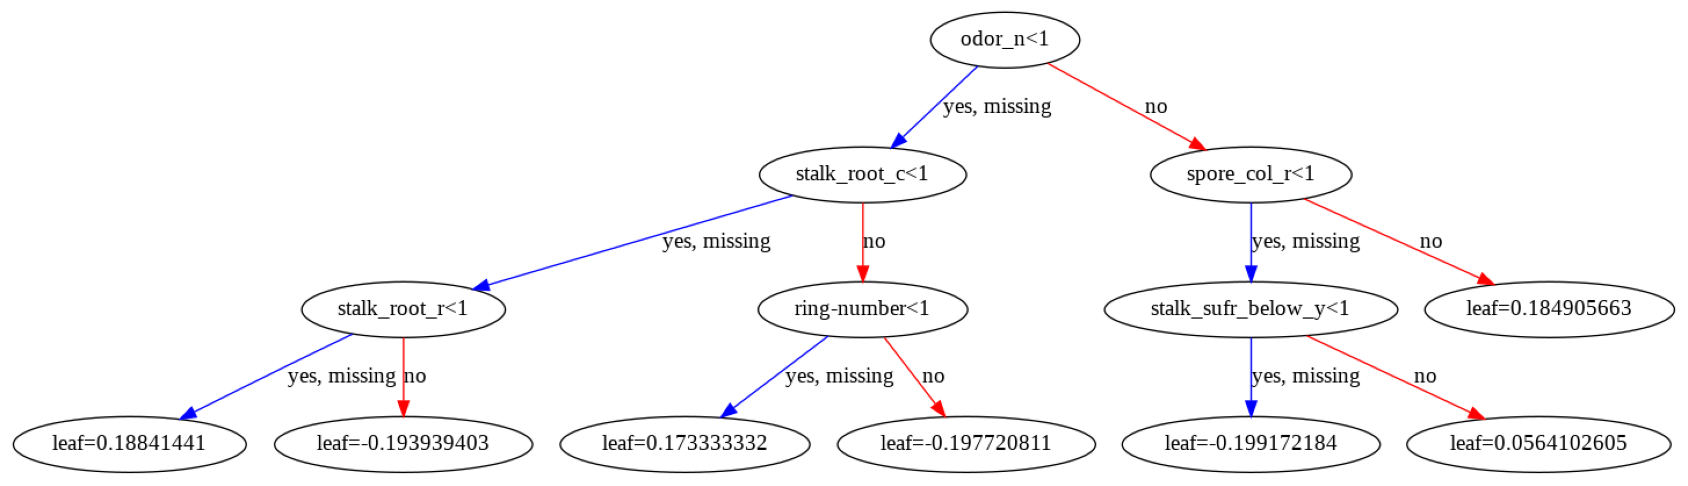

In [ ]:
plot_tree(model)
fig = plt.gcf()
fig.set_size_inches(30, 15)

Тут даже комментировать не стоит. Проклассифицировал идеально на дефолтных параметрах

##Random Forest


In [ ]:
X = df_enc.drop(columns=['is_poisonous'])
y =  df_enc['is_poisonous']

Разделим данные на тренировочные и тестовые

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100,  
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

Мы можем видеть, сколько узлов в среднем имеется для каждого дерева и максимальную глубину каждого дерева. В лесу было 100 деревьев

In [ ]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 65
Average maximum depth 12


In [ ]:
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


Accurancy = 1.0
Roc Auc Score = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       1.00      1.00      1.00      1183

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



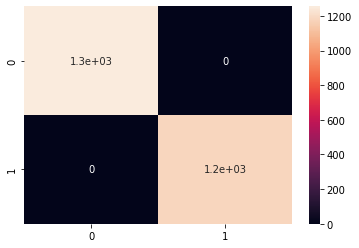

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

print("Accurancy =",accuracy_score(y_pred, y_test)) 
print("Roc Auc Score =", roc_auc_score(y_test, y_probs))  
print(classification_report(y_pred, y_test)) 
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

Random Forest для данного датасета получил максимальную точность классификации


##Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [ ]:
from sklearn.linear_model import LogisticRegression

lgrModel = LogisticRegression()
lgrModel.fit(X_train, y_train)
y_pred = lgrModel.predict(X_test)

Accurancy = 0.9995898277276456
Roc Auc Score = 0.5145072398214411
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1237
           1       1.00      1.00      1.00      1201

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



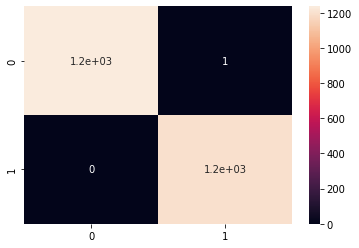

In [ ]:
print("Accurancy =",accuracy_score(y_pred, y_test)) 
print("Roc Auc Score =", roc_auc_score(y_test, y_probs))  
print(classification_report(y_pred, y_test)) 
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

Logistic Regression показал очень хорошие результаты, и неверно определил класс лишь для 1 объекта.

##KNN


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Accuracy:  0.99795 
Balanced accuracy:  0.99792


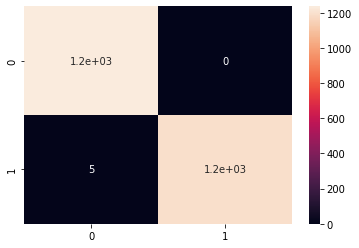

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


def plots_and_metrics(Ytest, Ypred):
    print(classification_report(Ytest, Ypred))
    print("Accuracy: ", round(accuracy_score(Ytest, Ypred), 5),
          "\nBalanced accuracy: ", round(balanced_accuracy_score(Ytest, Ypred), 5))
    sns.heatmap(confusion_matrix(Ytest, Ypred), annot=True)
    plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

n_ns = []
avg_scores = []
for i in range(5, 15):
    knnModel = KNeighborsClassifier(n_neighbors=i)
    knnModel.fit(X_train, y_train)
    scores = cross_val_score(knnModel,X, y, cv=10)
    avg_score = np.mean(scores)*100
    avg_scores.append(avg_score)
    n_ns.append(i)
    
knn_model = KNeighborsClassifier(n_neighbors=n_ns[avg_scores.index(max(avg_scores))])
knn_model.fit(X_train, y_train)
Ypred = knn_model.predict(X_test)
    
plots_and_metrics(y_test, Ypred)

KNN показал достойные результаты с точностью почти 100%, неправильно предсказав результат только лишь для 5 случаев.

##Naive bayes

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Accuracy:  0.99795 
Balanced accuracy:  0.99792


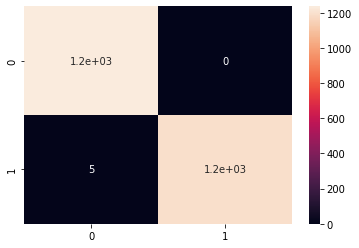

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

plots_and_metrics(y_test, Ypred)

Naive bayes показал аналогичные KNN результаты.